In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv("/content/spotify dataset.csv")

In [5]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [6]:
# 1. DATA PREPROCESSING
# Checking for missing values
df_cleaned = df.dropna(subset=['track_name', 'track_artist'])

# Removing duplicate tracks
df_cleaned = df_cleaned.drop_duplicates(subset=['track_id'])


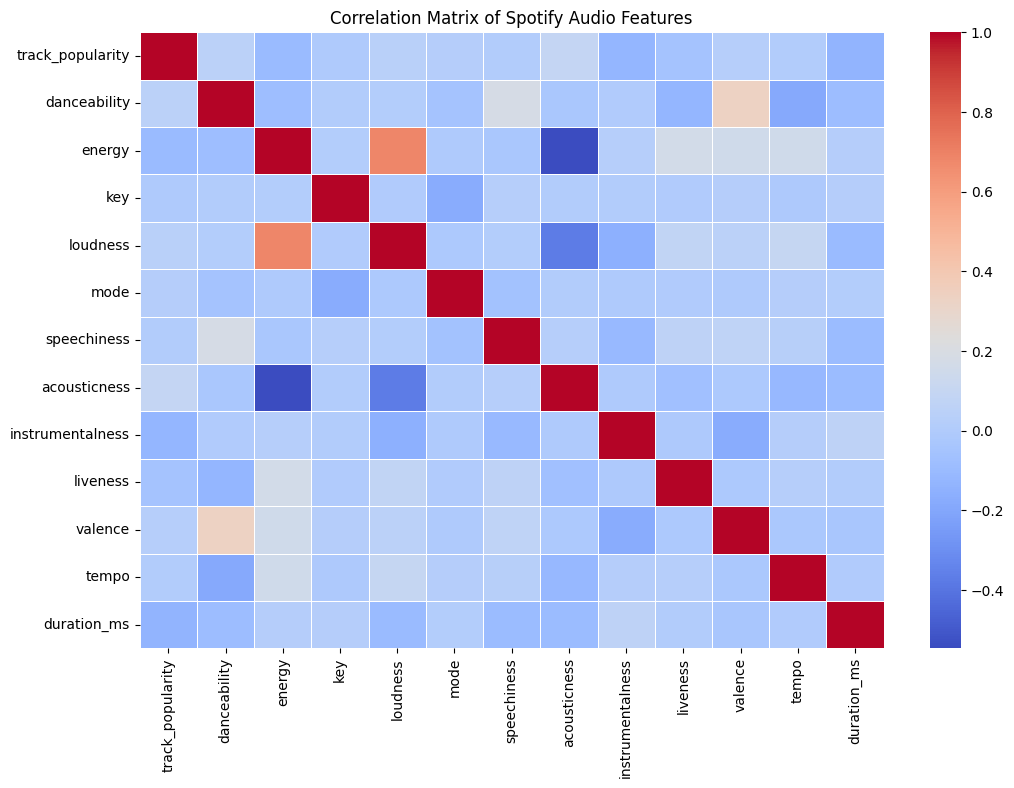

In [7]:
# 2. EXPLORATORY DATA ANALYSIS
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Spotify Audio Features")
plt.show()


In [8]:
# 3. CLUSTERING ANALYSIS
# Selecting numerical features
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']
X = df_cleaned[features]

In [9]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding the optimal clusters using the Elbow Method
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


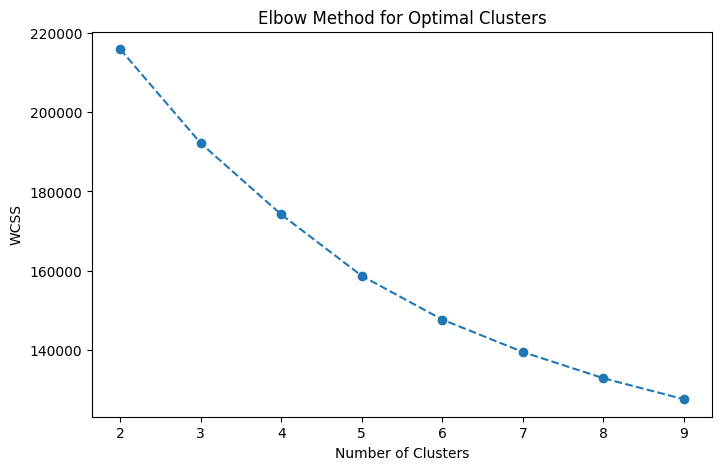

In [10]:
# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [11]:
# Applying KMeans with optimal clusters (assume 4 based on elbow method)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df_cleaned['cluster'] = kmeans.fit_predict(X_scaled)


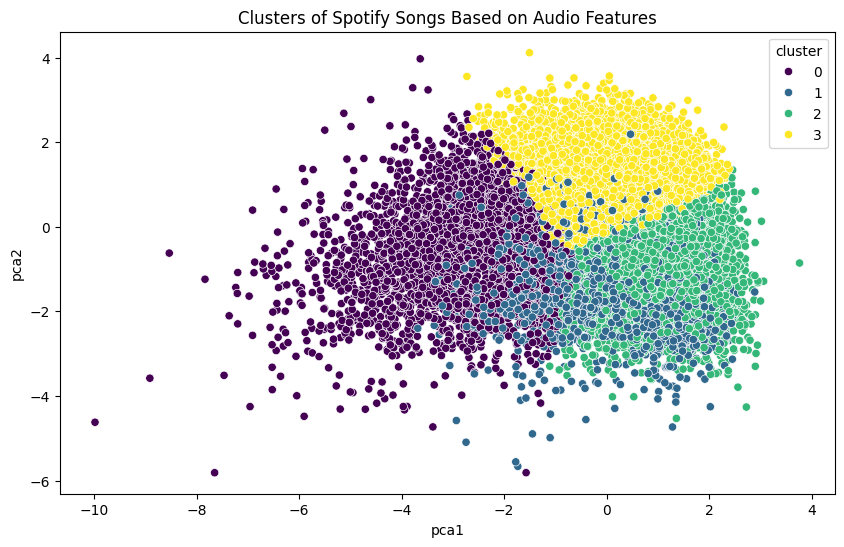

In [12]:
 #4. VISUALIZING CLUSTERS
# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_cleaned['pca1'] = X_pca[:, 0]
df_cleaned['pca2'] = X_pca[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df_cleaned, palette='viridis')
plt.title('Clusters of Spotify Songs Based on Audio Features')
plt.show()

In [13]:
# 5. SIMPLE RECOMMENDATION SYSTEM
def recommend_songs(song_name, n=5):
    """ Recommends similar songs based on the same cluster """
    song_cluster = df_cleaned[df_cleaned['track_name'].str.lower() == song_name.lower()]['cluster'].values
    if len(song_cluster) == 0:
        return "Song not found in the dataset."

    cluster_songs = df_cleaned[df_cleaned['cluster'] == song_cluster[0]]
    recommendations = cluster_songs.sample(n=n)  # Randomly pick n songs from the same cluster
    return recommendations[['track_name', 'track_artist', 'playlist_genre']]

# Example: Recommend 5 songs similar to "Someone You Loved"
print(recommend_songs("Someone You Loved", n=5))

                                              track_name     track_artist  \
16812                                     Drinking Alone     King & Joker   
18211                                              Lucía  Andrés Calamaro   
18121  Over My Head (Cable Car) - Live at Sirius Radi...         The Fray   
17284   Catch & Release - Deepend Remix Extended Version      Matt Simons   
13181                                             Keleya   Moussa Doumbia   

      playlist_genre  
16812          latin  
18211          latin  
18121          latin  
17284          latin  
13181           rock  
